In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
IMG_SIZE=224
BATCH_SIZE=32

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

print(os.listdir('/content/drive/MyDrive'))

train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

['Colab Notebooks', 'Screenshot_20251007_185224.jpg', 'IMG_20250623_105509.jpg', 'DAY 02 .gdoc', 'INTERN  .gdoc', 'brain_tumor_dataset', 'BRAIN_1765351741 (1).pdf', 'Alzheimer_s Dataset', 'Alzheimer_s Dataset.h5']


In [ ]:
train_generator=train_datagen.flow_from_directory(
'/content/drive/MyDrive/brain_tumor_dataset/train',
target_size=(IMG_SIZE,IMG_SIZE),
batch_size=BATCH_SIZE,
class_mode='binary',
subset='training'
  )


Found 915 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

print(os.listdir('/content/drive/MyDrive'))

val_datagen=ImageDataGenerator(rescale=1./255,validation_split=0.2)
val_generator=val_datagen.flow_from_directory('/content/drive/MyDrive/brain_tumor_dataset/train',
target_size=(IMG_SIZE,IMG_SIZE),
batch_size=BATCH_SIZE,
class_mode='binary',
subset='validation'
    )

['Colab Notebooks', 'Screenshot_20251007_185224.jpg', 'IMG_20250623_105509.jpg', 'DAY 02 .gdoc', 'INTERN  .gdoc', 'brain_tumor_dataset', 'BRAIN_1765351741 (1).pdf', 'Alzheimer_s Dataset', 'Alzheimer_s Dataset.h5']
Found 227 images belonging to 2 classes.


In [ ]:
model=keras.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(IMG_SIZE,IMG_SIZE,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(1,activation='sigmoid')


])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(train_generator,epochs=5,validation_data=val_generator,batch_size=BATCH_SIZE)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.5658 - loss: 0.7799

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


29/29 ━━━━━━━━━━━━━━━━━━━━ 185s 6s/step - accuracy: 0.5669 - loss: 0.7776 - val_accuracy: 0.6256 - val_loss: 0.6388
Epoch 2/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 123s 4s/step - accuracy: 0.6305 - loss: 0.6362 - val_accuracy: 0.6211 - val_loss: 0.6296
Epoch 3/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 121s 4s/step - accuracy: 0.6451 - loss: 0.5899 - val_accuracy: 0.4626 - val_loss: 0.6940
Epoch 4/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 123s 4s/step - accuracy: 0.6223 - loss: 0.6032 - val_accuracy: 0.5859 - val_loss: 0.6894
Epoch 5/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 125s 4s/step - accuracy: 0.5609 - loss: 0.6837 - val_accuracy: 0.6167 - val_loss: 0.6347


In [ ]:
model.save('/content/drive/MyDrive/brain_tumor_dataset/train.h5')

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
model=load_model('/content/drive/MyDrive/brain_tumor_dataset/train.h5')
print("model loaded")

model loaded


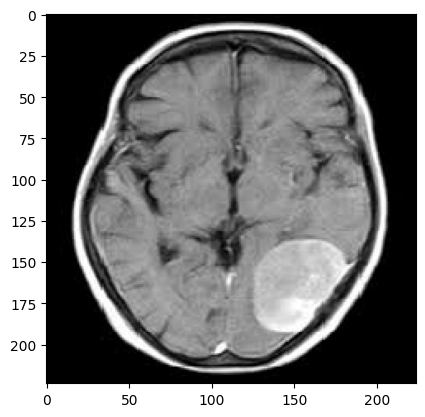

In [ ]:
test_image_path="/content/Y1715.jpg"
img=image.load_img(test_image_path,target_size=(224,224))
plt.imshow(img)
plt.axis()
plt.show()

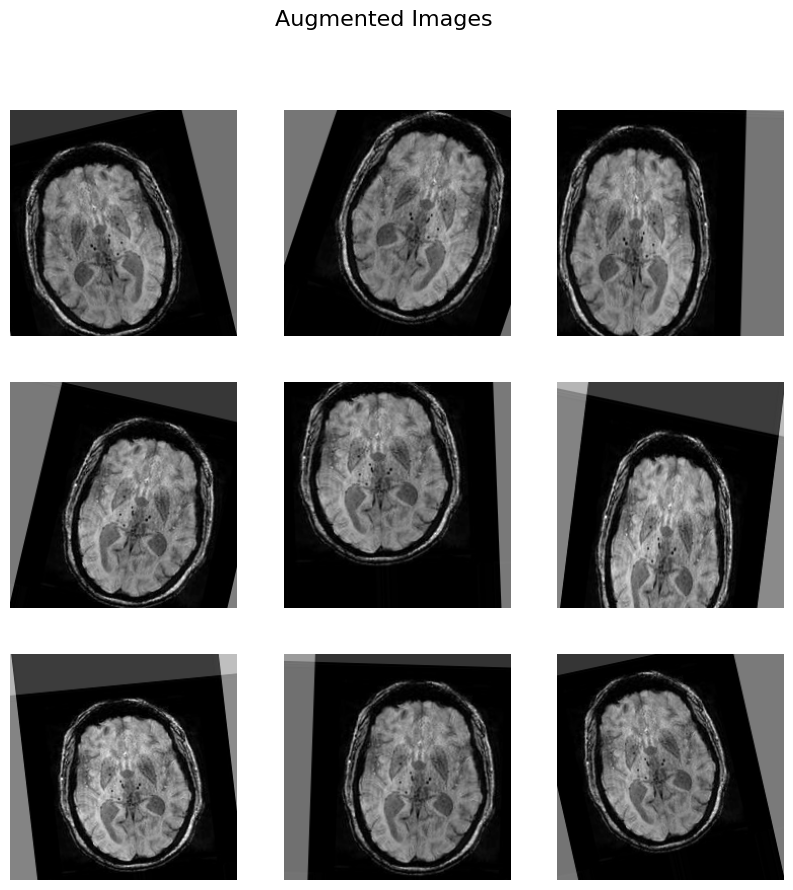

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image

# Load a sample image
# You can change this path to any image you want to see augmented
sample_image_path = '/content/N1428.jpg' # Using the test image path from earlier
img = image.load_img(sample_image_path, target_size=(IMG_SIZE, IMG_SIZE))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) # Add batch dimension

# Generate and display augmented images
plt.figure(figsize=(10, 10))
plt.suptitle("Augmented Images", fontsize=16)

for i, batch in enumerate(train_datagen.flow(img_array, batch_size=1)):
    if i >= 9: # Display 9 augmented images
        break
    plt.subplot(3, 3, i + 1)
    plt.imshow(image.array_to_img(batch[0]))
    plt.axis('off')
plt.show()

In [ ]:
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array/=255.

In [ ]:
prediction=model.predict(img_array)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
[[0.62840176]]


In [ ]:
if prediction>=0.5:
  print("you have brain tumor")
else:
  print("you did'nt have brain tumor")

you have brain tumor


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
